In [2]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:2px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:10pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:11pt;padding:4px;}
table.dataframe{font-size:10px;}
</style>
"""))

In [3]:
import numpy as np
import pandas as pd 
import sys
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 데이터 셋
from tensorflow.keras.utils import to_categorical  # 원핫인코딩
from tensorflow.keras.models import Sequential,save_model, load_model 
from tensorflow.keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # loss와 acc의 학습 과정 그래프
from sklearn.metrics import confusion_matrix # 혼동행렬
from sklearn.preprocessing import MinMaxScaler, StandardScaler # 스케일 조정
from sklearn.model_selection import train_test_split  # 데이터 분리

- Red Wine 등급 예측
1. 데이터 셋 확보
    CSV -> 결측지 처리 -> 독립변수와 타겟변수 분리 -> 독립변수 스케일 조정, 
    -> 타겟변수의 원핫인코딩 -> 훈련셋과 테스트셋 분리(train_test_split이용 층화추출)
2. 모델 구성(입력11, 출력6-pd.getdummoes. 출력9-to_ca) layer층 4
3. 모델 학습 과정 설정
4. 모델 학습(callbacks이용)
5. 모델 평가(그래프, 평가, 교차표)
6. 모델 저장 & 사용

# 데이터 확보 & 전처리


In [29]:
# fixed acidity : 고정 산도
# volatile acidity : 휘발성 산도
# citric acid : 시트르산
# residual sugar : 잔류 당분
# chlorides : 염화물
# free sulfur dioxide : 자유 이산화황
# total sulfur dioxide : 총 이산화황
# density : 밀도
# pH
# sulphates : 황산염
# alcohol
# quality : 0 ~ 10(높을 수록 좋은 품질)
data = pd.read_csv('data/winequality-red.csv', sep=';')
data['quality'].value_counts()

(5    681
 6    638
 7    199
 4     53
 8     18
 3     10
 Name: quality, dtype: int64,
       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.4             0.700         0.00             1.9      0.076   
 1               7.8             0.880         0.00             2.6      0.098   
 2               7.8             0.760         0.04             2.3      0.092   
 3              11.2             0.280         0.56             1.9      0.075   
 4               7.4             0.700         0.00             1.9      0.076   
 ...             ...               ...          ...             ...        ...   
 1594            6.2             0.600         0.08             2.0      0.090   
 1595            5.9             0.550         0.10             2.2      0.062   
 1596            6.3             0.510         0.13             2.3      0.076   
 1597            5.9             0.645         0.12             2.0      0.075   
 1598   

In [35]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values
X.shape, y.shape


((1599, 11), (1599, 1))

In [60]:
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X,
                                                   y,
                                                   test_size=0.3, # 테스트셋비율
                                                   random_state=7,
                                                   stratify=y # 층화추출
                                                   )

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119, 1), (480, 1))

In [62]:
Y_train = to_categorical(y_train, 10)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)
print(y_train[:2])
print(Y_test[:2])

[[6]
 [6]]
[[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [69]:
model = Sequential()
model.add(Input(shape=(11,)))
model.add(Dense(units=300, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=400, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=200, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 300)               3600      
                                                                 
 dense_21 (Dense)            (None, 400)               120400    
                                                                 
 dense_22 (Dense)            (None, 200)               80200     
                                                                 
 dense_23 (Dense)            (None, 10)                2010      
                                                                 
Total params: 206,210
Trainable params: 206,210
Non-trainable params: 0
_________________________________________________________________


In [70]:
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',  # sparse_categorical_crossentropy 원핫인코딩 안할때
             optimizer='adam',
             metrics=['accuracy'])

In [71]:
hist = model.fit(X_train,Y_train,
                epochs=100,
                batch_size=100,
                validation_split=(0.2),
                verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 27ms/step - loss: 1.8553 - accuracy: 0.3732 - val_loss: 1.3025 - val_accuracy: 0.3616
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.2756 - accuracy: 0.4793 - val_loss: 1.1731 - val_accuracy: 0.4955
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 1.1882 - accuracy: 0.5464 - val_loss: 1.0948 - val_accuracy: 0.5982
Epoch 4/100
9/9 [==============================] - 0s 8ms/step - loss: 1.1167 - accuracy: 0.5642 - val_loss: 1.0561 - val_accuracy: 0.6071
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 1.0725 - accuracy: 0.5654 - val_loss: 0.9963 - val_accuracy: 0.5893
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0308 - accuracy: 0.5866 - val_loss: 0.9546 - val_accuracy: 0.5982
Epoch 7/100
9/9 [==============================] - 0s 7ms/step - loss: 1.0090 - accuracy: 0.5821 - val_loss: 0.9418 - val_accuracy: 0.6027
Epoch 8/100
9/9 [=========

9/9 [==============================] - 0s 7ms/step - loss: 0.7558 - accuracy: 0.6704 - val_loss: 0.8699 - val_accuracy: 0.6607
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7473 - accuracy: 0.6927 - val_loss: 0.8914 - val_accuracy: 0.6562
Epoch 61/100
9/9 [==============================] - 0s 7ms/step - loss: 0.7366 - accuracy: 0.6749 - val_loss: 0.9050 - val_accuracy: 0.6339
Epoch 62/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7397 - accuracy: 0.6771 - val_loss: 0.8994 - val_accuracy: 0.6295
Epoch 63/100
9/9 [==============================] - 0s 8ms/step - loss: 0.7344 - accuracy: 0.6872 - val_loss: 0.8946 - val_accuracy: 0.6384
Epoch 64/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7345 - accuracy: 0.6905 - val_loss: 0.8914 - val_accuracy: 0.6384
Epoch 65/100
9/9 [==============================] - 0s 9ms/step - loss: 0.7317 - accuracy: 0.7106 - val_loss: 0.8999 - val_accuracy: 0.6250
Epoch 66/100
9/9 [===============

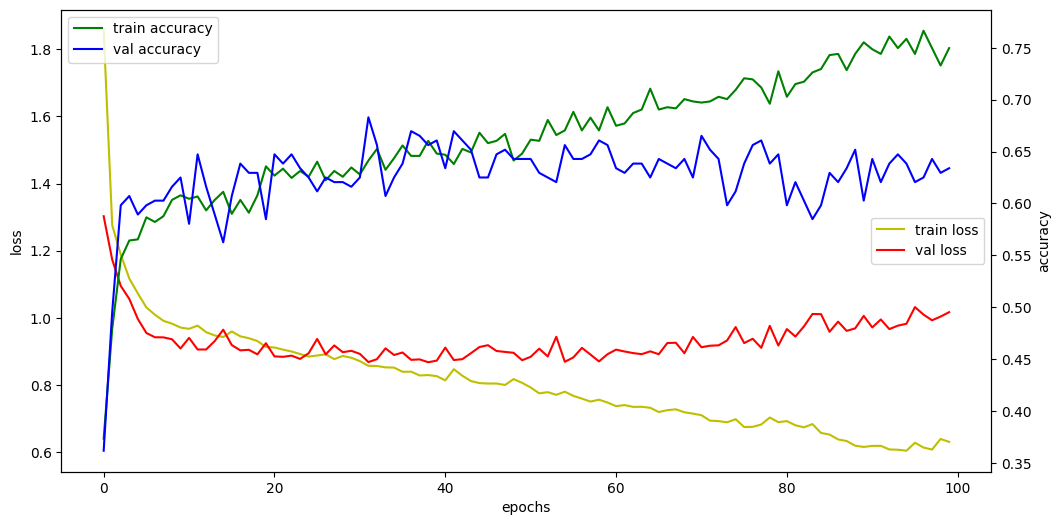

In [72]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [74]:
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)
print('loss :', loss_and_metrics[0])
print('accuracy : ', loss_and_metrics[1])

InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\tornado\platform\asyncio.py", line 211, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Admin\AppData\Local\Temp\ipykernel_11016\3897999031.py", line 1, in <module>
      loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=100)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1947, in evaluate
      tmp_logs = self.test_function(iterator)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1727, in test_function
      return step_function(self, iterator)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1713, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1701, in run_step
      outputs = model.test_step(data)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1667, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\losses.py", line 152, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\losses.py", line 272, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\losses.py", line 1990, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\keras\backend.py", line 5535, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[100,10] labels_size=[100,9]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_test_function_8368]